#ML LAB 1
## CHANAKYA BHARDWAJ MUDUNURU
## 21BCE1010

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. LOADING DATASET


In [ ]:
datafile = pd.read_csv('testdata.csv')
print(datafile.columns)
datafile

Index(['X1', 'X2', 'X3', 'X4', 'Y'], dtype='object')


X1   X2      X3     X4        Y
0    3.0  3.0     NaN  242.0   520000
1    5.0  5.0   729.0  268.0  1525000
2    2.0  2.0   292.0  125.0   720000
3    3.0  3.0   506.0  120.0  1120000
4    4.0  4.0  1057.0  220.0  1780000
..   ...  ...     ...    ...      ...
879  4.0  4.0   447.0  134.0   537000
880  3.0  3.0   554.0   95.0   717500
881  3.0  3.0   333.0  133.0  1031000
882  4.0  4.0   866.0  157.0  2500000
883  4.0  4.0   362.0  112.0  1285000

[884 rows x 5 columns]

# MISSING VALUE ANALYSIS

fillng mean value of columns in places where values is missing

In [ ]:


missing_values = datafile.isnull().sum()
print("Missing Values:\n", missing_values)


rows_with_null = datafile[datafile.isnull().any(axis=1)]
print("\nRows with Null Elements:")
print(rows_with_null)

mean_values = datafile.mean()
print("\nMean Values:", mean_values)
datafile_filled = datafile.fillna(mean_values)

print("\nDataFrame with Missing Values Filled with Mean:")
print(datafile_filled)

Missing Values:
 X1    3
X2    5
X3    4
X4    2
Y     0
dtype: int64

Rows with Null Elements:
      X1   X2     X3     X4        Y
0    3.0  3.0    NaN  242.0   520000
14   3.0  3.0    NaN  176.0   743000
35   3.0  NaN  557.0   90.0   696000
37   NaN  3.0  658.0  105.0   765000
48   3.0  NaN  204.0  106.0   876000
57   3.0  3.0  585.0    NaN  1155000
58   3.0  3.0    0.0    NaN   853000
60   4.0  NaN  277.0   87.0   775000
61   NaN  2.0    0.0   65.0   281000
86   2.0  NaN  222.0  109.0   835000
87   2.0  2.0    NaN   83.0   661000
88   NaN  2.0  258.0  108.0   757500
316  2.0  2.0    NaN   81.0   435000
318  4.0  NaN  581.0  130.0   626800

Mean Values: X1         2.869467
X2         2.821388
X3       407.998864
X4       129.456122
Y     836965.773756
dtype: float64

DataFrame with Missing Values Filled with Mean:
      X1   X2           X3     X4        Y
0    3.0  3.0   407.998864  242.0   520000
1    5.0  5.0   729.000000  268.0  1525000
2    2.0  2.0   292.000000  125.0   720000

# NORMALIZE DATA
## Min Max normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 5: Normalize the filled data using Min-Max normalization
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(datafile_filled), columns=datafile_filled.columns)

# Display the normalized data
print("Normalized Data:")
print(normalized_data)


Normalized Data:
           X1   X2        X3        X4         Y
0    0.285714  0.4  0.027020  0.343840  0.080367
1    0.571429  0.8  0.048278  0.381089  0.311137
2    0.142857  0.2  0.019338  0.176218  0.126292
3    0.285714  0.4  0.033510  0.169054  0.218140
4    0.428571  0.6  0.070000  0.312321  0.369690
..        ...  ...       ...       ...       ...
879  0.428571  0.6  0.029603  0.189112  0.084271
880  0.285714  0.4  0.036689  0.133238  0.125718
881  0.285714  0.4  0.022053  0.187679  0.197704
882  0.428571  0.6  0.057351  0.222063  0.535017
883  0.428571  0.6  0.023974  0.157593  0.256028

[884 rows x 5 columns]


# CHECKING LINEARITY BY PAIR PLOT

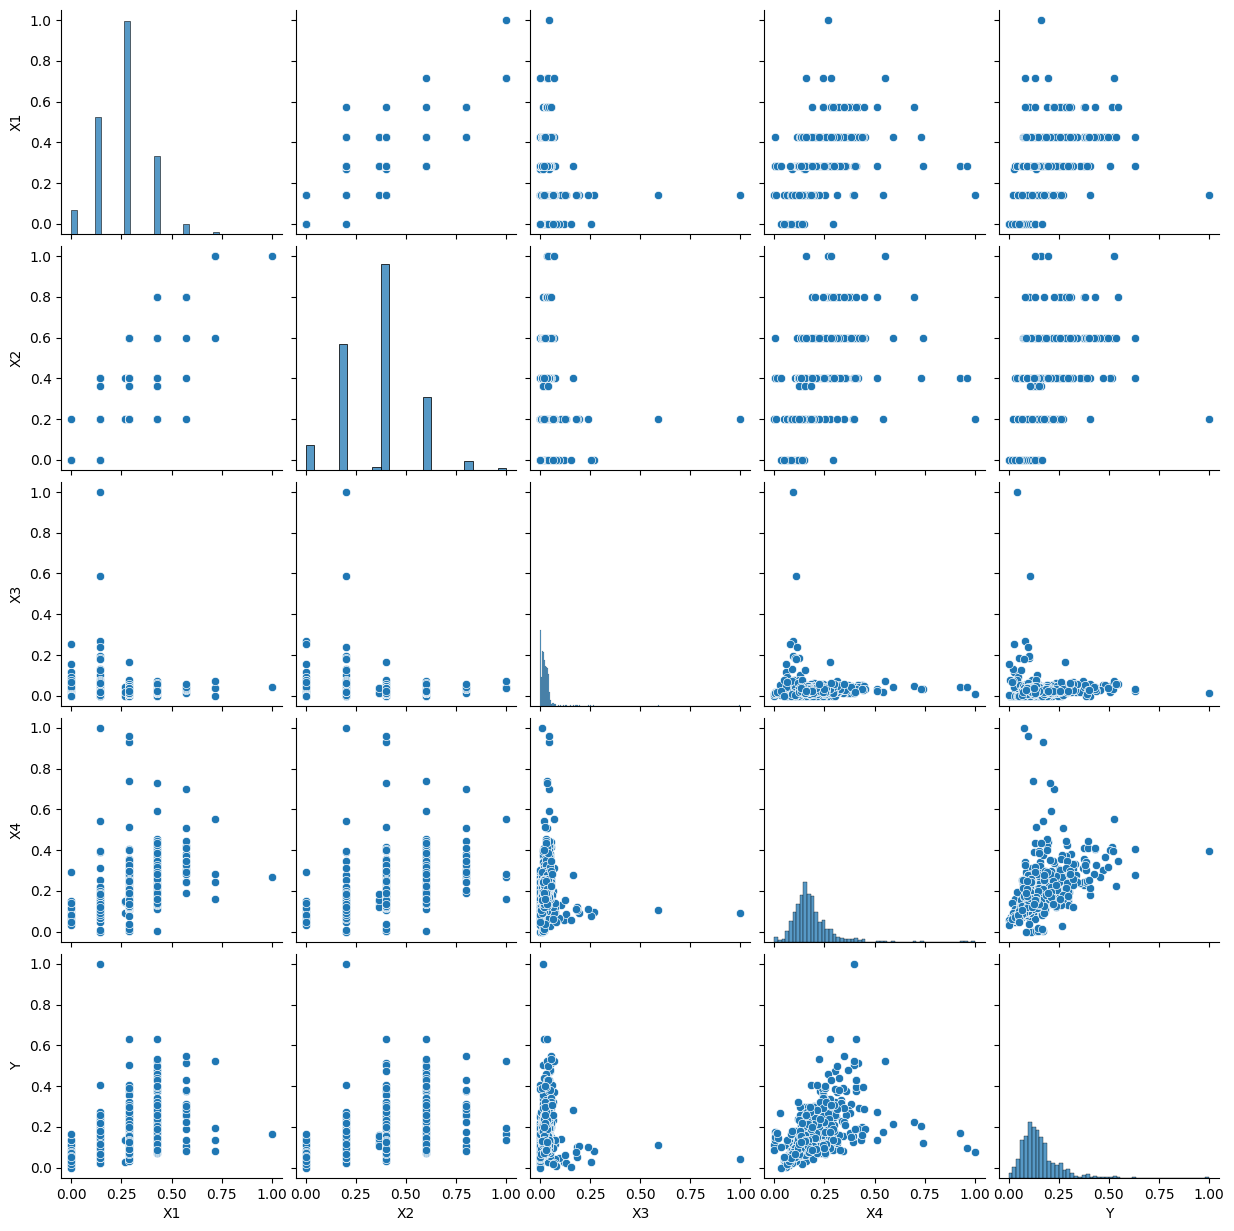

In [ ]:


sns.pairplot(normalized_data)
plt.show()


# CORRELATION

In [ ]:
correlation_matrix = normalized_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          X1        X2        X3        X4         Y
X1  1.000000  0.936105  0.052665  0.542105  0.482825
X2  0.936105  1.000000  0.051211  0.535689  0.470743
X3  0.052665  0.051211  1.000000  0.039890  0.020903
X4  0.542105  0.535689  0.039890  1.000000  0.468947
Y   0.482825  0.470743  0.020903  0.468947  1.000000


## LR IN NORMALIZED DATA

In [ ]:
#datafile

X = normalized_data[['X1', 'X2', 'X3', 'X4']]
Y = normalized_data['Y']

from sklearn import linear_model

regress = linear_model.LinearRegression()
train_x = np.asanyarray(X)
train_y = np.asanyarray(Y)
regress.fit(train_x, train_y)

print('Coefficients: ', regress.coef_)
print('Intercept: ', regress.intercept_)




Coefficients:  [ 0.1795797   0.04538536 -0.016274    0.27701705]
Intercept:  0.038512694291832544


In [ ]:
y_predicted = regress.predict(train_x)
print("TRAINED               PREDICTED")
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
normalized_data['Predicted'] = y_predicted
print(y_predicted)
print(normalized_data.head())

TRAINED               PREDICTED
0.08036739380022961 0.20278502155748854
0.3111366245694604 0.28222038065592636
0.12629161882893228 0.12174463316657697
0.21814006888633755 0.15426094754541012
0.36969001148105624 0.22808568050813208
0.10562571756601608 0.13507534942233484
0.11251435132032148 0.15534810141299943
0.09414466130884042 0.10911692008853612
0.26750861079219285 0.11507536595839188
0.0780711825487945 0.10247570574789018
0.058553386911595874 0.0949480599118574
0.12284730195177956 0.1672938939976047
0.05074626865671642 0.09824698152457174
0.15499425947187143 0.19270340675484932
0.13157290470723307 0.1765914319859153
0.1285878300803674 0.16306624752262178
0.06360505166475316 0.1028618008338013
0.11664753157290472 0.14105637792607198
0.09414466130884042 0.10242397382778545
0.15384615384615385 0.1605807317002759
0.09345579793340988 0.1518072418095364
0.15774971297359358 0.11141004132241808
0.1285878300803674 0.1082967552155422
0.08394948335246843 0.10839969508182519
0.1090700344431687

# ERROR METRICS

In [ ]:
print('Mean Absolute Error: %.2f' % np.mean(np.absolute(regress.predict(X) - Y)))
print('Mean Squared Error: %.2f' % np.mean((regress.predict(X) - Y) ** 2))
print('Root Mean Squared Error: %.2f' % np.sqrt(np.mean((regress.predict(X) - Y) ** 2)))

Mean Absolute Error: 0.05
Mean Squared Error: 0.01
Root Mean Squared Error: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
